# MCMC para aproximación de factores en GR​
Fernanda González, Jesús Sayes

## Librerias y datos generales

In [1]:
# librerias a utilizar

import numpy as np
# from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
# import math
# import random as rand
from scipy.optimize import minimize
# from scipy import integrate, interpolate
from astropy import units as u
# from astropy import constants as const
from astropy.coordinates import SkyCoord, Angle, CartesianDifferential, CartesianRepresentation, FK5, Galactic
from astropy.time import Time
from IPython.display import display, Math
import random

In [2]:
# datos para S2

ra = 359.94425987 *u.deg  # Ascensión recta en grados
dec = -0.04616238 *u.deg # Declinación en grados
vx = -177.4 * u.km/u.s
vy = 14.5 * u.km/u.s
d = 12.562 * u.parsec

ce = 299792458
G = 6.6743e-11
M = 1.98840987e+30 * 19.5


# para pasar a velocidades angulares
pm_ra_cosdec = (vx / d.to(u.km)).to(u.mas/u.yr, equivalencies=u.dimensionless_angles())
pm_dec = (vy / d.to(u.km)).to(u.mas/u.yr, equivalencies=u.dimensionless_angles())

# Crea el Skycoord de la posicion
c = SkyCoord(ra=ra, dec=dec, frame='icrs', pm_ra_cosdec=pm_ra_cosdec, pm_dec=pm_dec)

# Imprime las coordenadas en el sistema galáctico
print(c.galactic)

<SkyCoord (Galactic): (l, b) in deg
    (96.19736567, -60.20861016)
 (pm_l_cosb, pm_b) in mas / yr
    (-2632.3505947, 1415.83126442)>


## Trayectoria Clasica

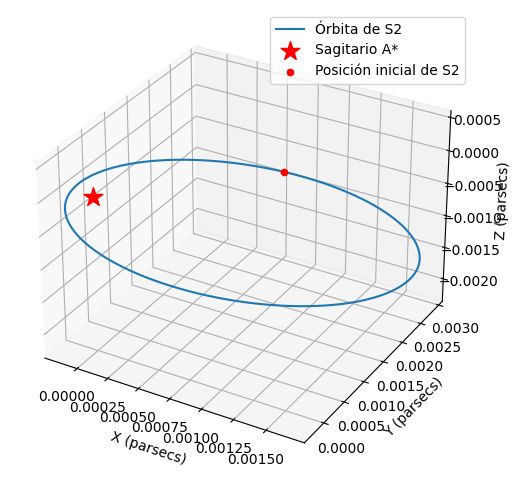

In [3]:
# modelo 3d de la trayectoria de S2

# Parámetros de la órbita de S2
a = 0.002  # Semieje mayor en parsecs
e = 0.88   # Excentricidad
omega = np.radians(150)  # Argumento del periastro en radianes
i = np.radians(60)  # Inclinación en radianes
N = 10**6 # Numero de puntos

# Generar trayectorias de la orbita con la solucion clasica del sistema
theta = np.linspace(0, 2 * np.pi, N)
r = a * (1 - e**2) / (1 + e * np.cos(theta - omega))

# pasamos el sistema a cartesianas
x_orbit = r * np.cos(theta)
y_orbit = r * np.sin(theta)

x = x_orbit * np.cos(i)
y = x_orbit * np.sin(i)
z = y_orbit

# agregamos SgA* al grafico y la posicion inicial de S2
sgr_a_pos = np.array([0, 0, 0])
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Órbita de S2')
ax.scatter(*sgr_a_pos, color='red', marker='*', s=200, label='Sagitario A*')
ax.scatter([x[0]], [y[0]], [z[0]], color='red', label='Posición inicial de S2')
ax.set_xlabel('X (parsecs)')
ax.set_ylabel('Y (parsecs)')
ax.set_zlabel('Z (parsecs)')
ax.legend()
plt.show()

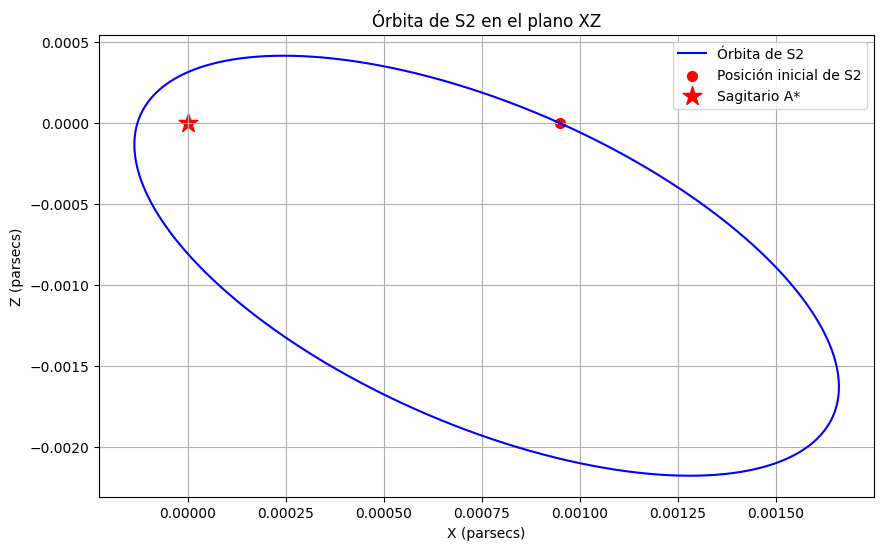

In [ ]:
# trayectoria de S2 en 2D XZ


plt.figure(figsize=(10, 6))
plt.plot(x, z, label='Órbita de S2', color='blue')
plt.scatter([x[0]], [z[0]], color='red', label='Posición inicial de S2', s=50)
plt.scatter(0,0, color='red', marker='*', s=200, label='Sagitario A*')
plt.xlabel('X (parsecs)')
plt.ylabel('Z (parsecs)')
plt.title('Órbita de S2 en el plano XZ')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Trayectorias 2D de S1 a S6


# Parámetros de las órbitas de S1 a S6
a_s1 = 0.0015
e_s1 = 0.75
omega_s1 = np.radians(120)
i_s1 = np.radians(45)

a_s2 = 0.002
e_s2 = 0.88
omega_s2 = np.radians(150)
i_s2 = np.radians(60)

a_s3 = 0.0022
e_s3 = 0.9
omega_s3 = np.radians(170)
i_s3 = np.radians(65)

a_s4 = 0.0017
e_s4 = 0.8
omega_s4 = np.radians(200)
i_s4 = np.radians(50)

a_s5 = 0.0018
e_s5 = 0.82
omega_s5 = np.radians(240)
i_s5 = np.radians(55)

a_s6 = 0.0023
e_s6 = 0.92
omega_s6 = np.radians(280)
i_s6 = np.radians(70)

# Genera las trayectorias
theta = np.linspace(0, 2 * np.pi, 10**4)

r_s2 = a_s2 * (1 - e_s2**2) / (1 + e_s2 * np.cos(theta - omega_s2))
r_s1 = a_s1 * (1 - e_s1**2) / (1 + e_s1 * np.cos(theta - omega_s1))
r_s3 = a_s3 * (1 - e_s3**2) / (1 + e_s3 * np.cos(theta - omega_s3))
r_s4 = a_s4 * (1 - e_s4**2) / (1 + e_s4 * np.cos(theta - omega_s4))
r_s5 = a_s5 * (1 - e_s5**2) / (1 + e_s5 * np.cos(theta - omega_s5))
r_s6 = a_s6 * (1 - e_s6**2) / (1 + e_s6 * np.cos(theta - omega_s6))

# Pasamos al plano cartesiano
x_s1 = r_s1 * np.cos(theta)
z_s1 = r_s1 * np.sin(theta)

x_s2 = r_s2 * np.cos(theta)
z_s2 = r_s2 * np.sin(theta)

x_s3 = r_s3 * np.cos(theta)
z_s3 = r_s3 * np.sin(theta)

x_s4 = r_s4 * np.cos(theta)
z_s4 = r_s4 * np.sin(theta)

x_s5 = r_s5 * np.cos(theta)
z_s5 = r_s5 * np.sin(theta)

x_s6 = r_s6 * np.cos(theta)
z_s6 = r_s6 * np.sin(theta)



x_s1_3d = x_s1 * np.cos(i_s1) * 10
z_s1_3d = z_s1 * 10

x_s2_3d = x_s2 * np.cos(i_s2) * 10
z_s2_3d = z_s2 * 10

x_s3_3d = x_s3 * np.cos(i_s3) * 10
z_s3_3d = z_s3 * 10

x_s4_3d = x_s4 * np.cos(i_s4) * 10
z_s4_3d = z_s4 * 10

x_s5_3d = x_s5 * np.cos(i_s5) * 10
z_s5_3d = z_s5 * 10

x_s6_3d = x_s6 * np.cos(i_s6) * 10
z_s6_3d = z_s6 * 10



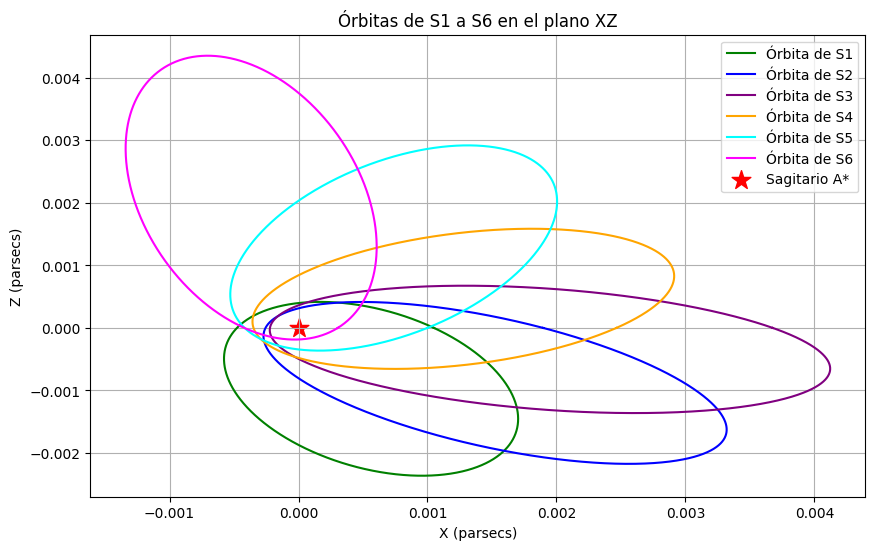

In [ ]:
# Graficos

plt.figure(figsize=(10, 6))
plt.plot(x_s1, z_s1, label='Órbita de S1', color='green')
plt.plot(x_s2, z_s2, label='Órbita de S2', color='blue')
plt.plot(x_s3, z_s3, label='Órbita de S3', color='purple')
plt.plot(x_s4, z_s4, label='Órbita de S4', color='orange')
plt.plot(x_s5, z_s5, label='Órbita de S5', color='cyan')
plt.plot(x_s6, z_s6, label='Órbita de S6', color='magenta')
plt.scatter(0, 0, color='red', marker='*', s=200, label='Sagitario A*')
plt.xlabel('X (parsecs)')
plt.ylabel('Z (parsecs)')
plt.title('Órbitas de S1 a S6 en el plano XZ')
plt.legend()
plt.grid(True)
plt.show()


## Trayectoria GR

In [ ]:
# datos para S2

ra = 359.94425987 *u.deg  # Ascensión recta en grados
dec = -0.04616238 *u.deg # Declinación en grados
vx = -177.4 * u.km/u.s
vy = 14.5 * u.km/u.s
d = 12.562 * u.parsec

ce = 299792458
G = 6.6743e-11
M = 1.98840987e+30 * 19.5


# para pasar a velocidades angulares
pm_ra_cosdec = (vx / d.to(u.km)).to(u.mas/u.yr, equivalencies=u.dimensionless_angles())
pm_dec = (vy / d.to(u.km)).to(u.mas/u.yr, equivalencies=u.dimensionless_angles())

# Crea el Skycoord de la posicion
coord = SkyCoord(ra=ra, dec=dec, frame='icrs', pm_ra_cosdec=pm_ra_cosdec, pm_dec=pm_dec, obstime='J2000')

# Imprime las coordenadas en el sistema galáctico
print(c.galactic)

<SkyCoord (Galactic): (l, b) in deg
    (96.19736567, -60.20861016)
 (pm_l_cosb, pm_b) in mas / yr
    (-2632.3505947, 1415.83126442)>


/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "pmsafe" yielded 1 of "distance overridden (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


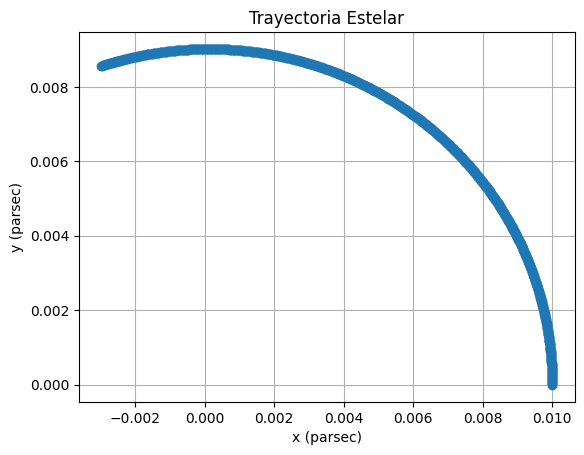

In [ ]:
# Definir un rango de años para seguir la trayectoria y la lista de posiciones
years = np.arange(2000, 10**4, 10)
positions = []

# Calcular la posición en cada año y almacenarla en la lista
for year in years:
    time = Time(f'{year}-01-01T00:00:00')
    current_position = coord.apply_space_motion(time)
    current_position = current_position.transform_to(FK5(equinox=time))
    positions.append(current_position)

# Extraer las coordenadas y convertirlas a grados para graficar
ra_values = [pos.ra.deg for pos in positions]
dec_values = [pos.dec.deg for pos in positions]
pm_ra_values = [pos.pm_ra_cosdec for pos in positions]
pm_dec_values = [pos.pm_dec for pos in positions]

x = []
y = []
z = []

for i in range(len(ra_values)):
  # para cada dato lo pasamos a skycoord para calcular sus componentes cartesianas
  c = SkyCoord(ra=ra_values[i]*u.deg, dec=dec_values[i]*u.deg, frame='icrs', pm_ra_cosdec=pm_ra_values[i].value*u.mas/u.yr, pm_dec=pm_dec_values[i].value*u.mas/u.yr)
  x_cartesian = c.cartesian.x.value * 1e-2 #reescalado
  y_cartesian = c.cartesian.y.value * 1e-2
  z_cartesian = c.cartesian.z.value * 1e-2
  x.append(x_cartesian)
  y.append(y_cartesian)
  z.append(z_cartesian)

plt.plot(x, y, marker='o')
plt.xlabel('x (parsec)')
plt.ylabel('y (parsec)')
plt.title('Trayectoria Estelar')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "pmsafe" yielded 1 of "distance overridden (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


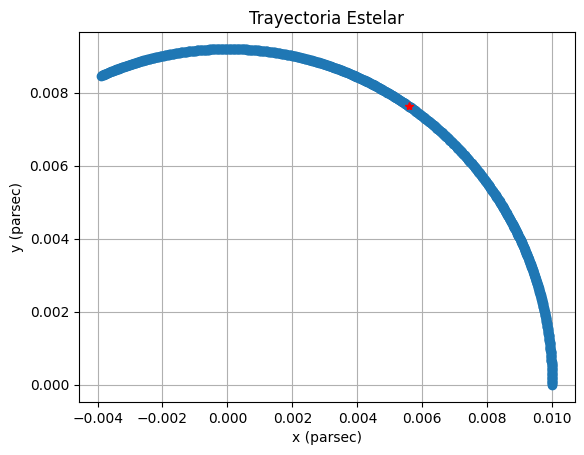

In [ ]:
# este no correr

# Parámetros iniciales
ra = 359.94425987  # Ascensión recta en grados
dec = -0.04616238  # Declinación en grados
pm_ra = -177.4  # Movimiento propio en ascensión recta en mas/año
pm_dec = 14.5  # Movimiento propio en declinación en mas/año

# Crear un objeto SkyCoord para la posición inicial
initial_position = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs', pm_ra_cosdec=pm_ra*u.mas/u.yr, pm_dec=pm_dec*u.mas/u.yr, obstime='J2000')

# Definir un rango de años para seguir la trayectoria
years = np.arange(2000, 10**4, 10)

# Lista para almacenar las posiciones en cada año
positions = []

# Calcular la posición en cada año y almacenarla en la lista
for year in years:
    # Calcular el tiempo para cada año
    time = Time(f'{year}-01-01T00:00:00')

    # Calcular la posición en ese momento
    current_position = initial_position.apply_space_motion(time)

    # Actualizar la obstime para la siguiente iteración
    current_position = current_position.transform_to(FK5(equinox=time))

    # Almacenar la posición en la lista
    positions.append(current_position)

# Extraer las coordenadas y convertirlas a grados para graficar
ra_values = [pos.ra.deg for pos in positions]
dec_values = [pos.dec.deg for pos in positions]
pm_ra_values = [pos.pm_ra_cosdec for pos in positions]
pm_dec_values = [pos.pm_dec for pos in positions]


x = []
y = []
z = []
for i in range(len(ra_values)):
  c = SkyCoord(ra=ra_values[i]*u.deg, dec=dec_values[i]*u.deg, frame='icrs', pm_ra_cosdec=pm_ra_values[i].value*u.mas/u.yr, pm_dec=pm_dec_values[i].value*u.mas/u.yr)
  # Obtener las componentes cartesianas
  x_cartesian = c.cartesian.x.value * 1e-2
  y_cartesian = c.cartesian.y.value * 1e-2
  z_cartesian = c.cartesian.z.value * 1e-2
  x.append(x_cartesian)
  y.append(y_cartesian)
  z.append(z_cartesian)


plt.plot(x, y, marker='o')
plt.scatter(x[len(years)//2], y[len(years)//2], color='red', marker='*', s=200, label='Sgr A*')

plt.xlabel('x (parsec)')
plt.ylabel('y (parsec)')
plt.title('Trayectoria Estelar')
plt.grid(True)
plt.show()

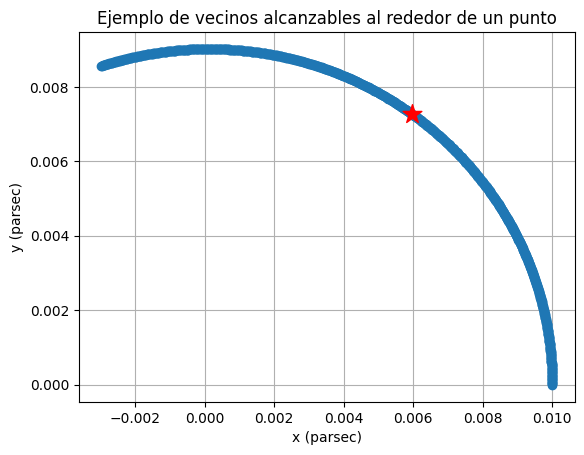

In [ ]:
# dado un punto de la trayectoria el limite alcanzable que permite skycoord es es de 9000 yr,
# para los vecinos se definira la posicion vase en 5000 y sus vecinos estaran en el intervalo [1000,9000]

plt.plot(x, y, marker='o')
plt.scatter(x[len(years)//2], y[len(years)//2], color='red', marker='*', s=200, label='Sgr A*', zorder=10)
plt.xlabel('x (parsec)')
plt.ylabel('y (parsec)')
plt.title('Ejemplo de vecinos alcanzables al rededor de un punto')
plt.grid(True)
plt.show()

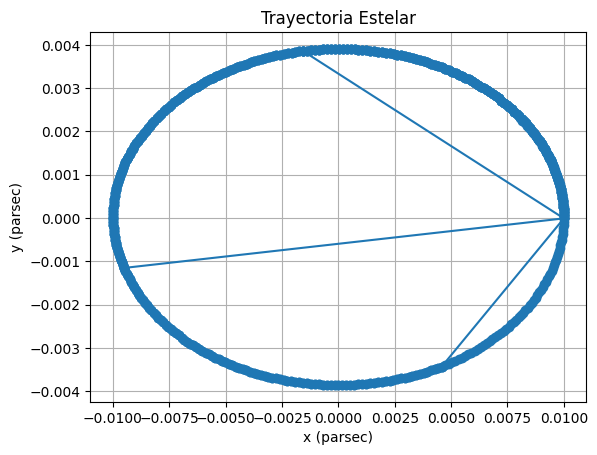

In [ ]:
# generamos ahora la trayectoria completa

paralelaje = 0.0031 * u.deg # esto permite correguir un poco la trayectoria

pm_ra = (-177.4 * u.km/u.s /d *paralelaje).to(u.mas/u.yr)  # Velocidad propia en ascensión recta
pm_dec = (14.5 * u.km/u.s /d *paralelaje).to(u.mas/u.yr)  # Velocidad propia en declinación


# para crear la trayectoria completa generamos varias de distintos trozos y las unimos


initial_position = SkyCoord(ra=ra, dec=dec, frame='icrs', pm_ra_cosdec=pm_ra, pm_dec=pm_dec, obstime='J2000')
years = np.linspace(2000,9000,100,dtype=int)
positions = []

for year in years:
    time = Time(f'{year}-01-01T00:00:00')
    current_position = initial_position.apply_space_motion(time)
    current_position = current_position.transform_to(FK5(equinox=time))
    positions.append(current_position)
ra_values = [pos.ra.deg for pos in positions]
dec_values = [pos.dec.deg for pos in positions]
pm_ra_values = [pos.pm_ra_cosdec for pos in positions]
pm_dec_values = [pos.pm_dec for pos in positions]


x = []
y = []
z = []
for i in range(len(ra_values)):
  c = SkyCoord(ra=ra_values[i]*u.deg, dec=dec_values[i]*u.deg, frame='icrs', pm_ra_cosdec=pm_ra_values[i].value*u.mas/u.yr, pm_dec=pm_dec_values[i].value*u.mas/u.yr)
  x_cartesian = c.cartesian.x.value * 1e-2
  y_cartesian = c.cartesian.y.value * 1e-2
  z_cartesian = c.cartesian.z.value * 1e-2
  x.append(x_cartesian)
  y.append(y_cartesian)
  z.append(z_cartesian)

ra = ra_values[-1]
dec = dec_values[-1]
pm_ra = pm_ra_values[-1]
pm_dec = pm_dec_values[-1]

initial_position = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs', pm_ra_cosdec=pm_ra, pm_dec=pm_dec, obstime='J2000')
for year in years:
    time = Time(f'{year}-01-01T00:00:00')
    current_position = initial_position.apply_space_motion(time)
    current_position = current_position.transform_to(FK5(equinox=time))
    positions.append(current_position)
ra_values = [pos.ra.deg for pos in positions]
dec_values = [pos.dec.deg for pos in positions]
pm_ra_values = [pos.pm_ra_cosdec for pos in positions]
pm_dec_values = [pos.pm_dec for pos in positions]


for i in range(len(ra_values)):
  c = SkyCoord(ra=ra_values[i]*u.deg, dec=dec_values[i]*u.deg, frame='icrs', pm_ra_cosdec=pm_ra_values[i].value*u.mas/u.yr, pm_dec=pm_dec_values[i].value*u.mas/u.yr)
  x_cartesian = c.cartesian.x.value * 1e-2
  y_cartesian = c.cartesian.y.value * 1e-2
  z_cartesian = c.cartesian.z.value * 1e-2
  x.append(x_cartesian)
  y.append(y_cartesian)
  z.append(z_cartesian)

ra = ra_values[-1]
dec = dec_values[-1]
pm_ra = pm_ra_values[-1]
pm_dec = pm_dec_values[-1]

initial_position = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs', pm_ra_cosdec=pm_ra, pm_dec=pm_dec, obstime='J2000')
for year in years:
    time = Time(f'{year}-01-01T00:00:00')
    current_position = initial_position.apply_space_motion(time)
    current_position = current_position.transform_to(FK5(equinox=time))
    positions.append(current_position)
ra_values = [pos.ra.deg for pos in positions]
dec_values = [pos.dec.deg for pos in positions]
pm_ra_values = [pos.pm_ra_cosdec for pos in positions]
pm_dec_values = [pos.pm_dec for pos in positions]


for i in range(len(ra_values)):
  c = SkyCoord(ra=ra_values[i]*u.deg, dec=dec_values[i]*u.deg, frame='icrs', pm_ra_cosdec=pm_ra_values[i].value*u.mas/u.yr, pm_dec=pm_dec_values[i].value*u.mas/u.yr)
  x_cartesian = c.cartesian.x.value * 1e-2
  y_cartesian = c.cartesian.y.value * 1e-2
  z_cartesian = c.cartesian.z.value * 1e-2
  x.append(x_cartesian)
  y.append(y_cartesian)
  z.append(z_cartesian)

ra = ra_values[-1]
dec = dec_values[-1]
pm_ra = pm_ra_values[-1]
pm_dec = pm_dec_values[-1]

initial_position = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs', pm_ra_cosdec=pm_ra, pm_dec=pm_dec, obstime='J2000')
for year in years:
    time = Time(f'{year}-01-01T00:00:00')
    current_position = initial_position.apply_space_motion(time)
    current_position = current_position.transform_to(FK5(equinox=time))
    positions.append(current_position)

ra_values = [pos.ra.deg for pos in positions]
dec_values = [pos.dec.deg for pos in positions]
pm_ra_values = [pos.pm_ra_cosdec for pos in positions]
pm_dec_values = [pos.pm_dec for pos in positions]


for i in range(len(ra_values)):
  c = SkyCoord(ra=ra_values[i]*u.deg, dec=dec_values[i]*u.deg, frame='icrs', pm_ra_cosdec=pm_ra_values[i].value*u.mas/u.yr, pm_dec=pm_dec_values[i].value*u.mas/u.yr)
  x_cartesian = c.cartesian.x.value * 1e-2
  y_cartesian = c.cartesian.y.value * 1e-2
  z_cartesian = c.cartesian.z.value * 1e-2
  x.append(x_cartesian)
  y.append(y_cartesian)
  z.append(z_cartesian)


plt.plot(x, z, marker='o')
plt.plot(x[0],z[0])
plt.xlabel('x (parsec)')
plt.ylabel('y (parsec)')
plt.title('Trayectoria Estelar')
plt.grid(True)
plt.show()

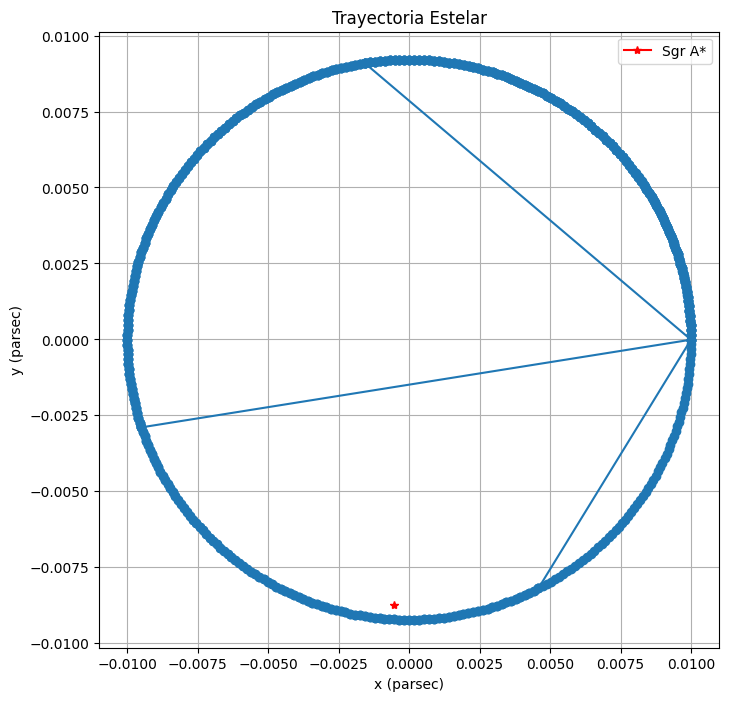

In [ ]:
# Coordenadas de Sagittarius A* en grados (usando coordenadas aproximadas)
sgr_a_star_coord = SkyCoord(ra=266.41683 * u.deg, dec=-29.00781 * u.deg, frame='icrs')

# Convertir coordenadas esféricas a cartesianas
x_sag = sgr_a_star_coord.cartesian.x * 1e-2 # reescalado
y_sag = sgr_a_star_coord.cartesian.y * 1e-2
z_sag = sgr_a_star_coord.cartesian.z * 1e-2

# Graficar la posición de Sagittarius A* en coordenadas cartesianas
plt.figure(figsize=(8, 8))

# Graficar la trayectoria
plt.plot(x, y, marker='o')
plt.plot(x[0],y[0])
plt.plot(x_sag, y_sag, color='red', marker='*', label='Sgr A*')
plt.xlabel('x (parsec)')
plt.ylabel('y (parsec)')
plt.title('Trayectoria Estelar')
plt.grid(True)
plt.legend()
plt.show()

## Metodo MCMC

In [ ]:
# funciones


coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs', pm_ra_cosdec=pm_ra, pm_dec=pm_dec, obstime='J5000')

# funcion chi que se busca minimizar
def chi(coord,x_cl,y_cl):
  x0_GR = coord.cartesian.x.value
  y0_GR = coord.cartesian.y.value
  s = 0
  for i in range(1,len(x_cl)):
    s += ((x_cl[i] - x0_GR)/(x_cl[i] - x_cl[i-1]))**2
  for j in range(1,len(y_cl)):
    s += ((y_cl[j] - y0_GR)/(y_cl[j]- y_cl[j-1]))**2
  return s * 3.24078e-17


print(coord)
print(chi(coord,x_s2,z_s2) * 3.24078e-17)

# funcion que dado un punto genera un vecino de este a travez de la trayectoria relativista
def vecino(x_cl,y_cl,coord):
  num = random.randint(1000,9000)
  year = num
  time = Time(f'{year}-01-01T00:00:00')
  coord = coord.apply_space_motion(time)

  ra = coord.ra.deg
  dec = coord.dec.deg
  pm_ra = coord.pm_ra_cosdec
  pm_dec = coord.pm_dec

  coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs', pm_ra_cosdec=pm_ra, pm_dec=pm_dec, obstime='J5000')
  return coord

coord = vecino(x_s2, z_s2,coord)
print(coord)
print(chi(coord,x_s2,z_s2) * 3.24078e-17)


<SkyCoord (ICRS): (ra, dec) in deg
    (299.19789005, -20.07153632)
 (pm_ra_cosdec, pm_dec) in mas / yr
    (-0.15486168, 0.04658937)>
3.471078946136695e-11
<SkyCoord (ICRS): (ra, dec) in deg
    (299.19774277, -20.0714947)
 (pm_ra_cosdec, pm_dec) in mas / yr
    (-0.15486164, 0.04658951)>
3.4710492440662075e-11


In [ ]:
def MCMC(coord, x , y , beta,  n):
  h0 = chi(coord,x,y)
  u = np.random.uniform(0, 1, n)
  for i in range(n):
    new_coord = vecino(x,y,coord)
    h1 = chi(new_coord,x,y)
    cte = min(1.0, np.exp(-beta * (h0 - h1)))
    if u[i] <= cte:
      coord = new_coord
      h0 = h1

  return [coord,h0]

coord , h0 = MCMC(coord , x_s2 , z_s2 , 0.1 , 10**3)

print(coord)
print(h0)

/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "pmsafe" yielded 1 of "distance overridden (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


<SkyCoord (ICRS): (ra, dec) in deg
    (299.28591802, -20.09638492)
 (pm_ra_cosdec, pm_dec) in mas / yr
    (-0.15488623, 0.04650766)>
1076544.4363458052


## Obtener la cota

In [ ]:
from astropy.coordinates import Galactic, CartesianRepresentation, CartesianDifferential
import astropy.units as u
import numpy as np

# Supongamos que ya tienes las coordenadas galácticas, las velocidades galácticas y la distancia
# (asegúrate de tener las unidades correctas)
coordenadas_galacticas = coord.transform_to(Galactic)
velocidades_galacticas_masyr = coordenadas_galacticas.velocity.d_xyz
distancia_pc = 12.562  # Coloca aquí la distancia en parsecs

# Convertir velocidades angulares a velocidades lineales en km/s
constante_conversion = (distancia_pc * u.pc).to(u.km)
velocidades_lineales_kmps = (velocidades_galacticas_masyr * constante_conversion).to(u.km/u.s)

# Transformar coordenadas galácticas a coordenadas cartesianas
coordenadas_cartesianas = coordenadas_galacticas.represent_as(CartesianRepresentation)

# Obtener velocidades cartesianas en coordenadas cartesianas
# (asegúrate de tener las unidades correctas)
velocidades_cartesianas = CartesianDifferential(velocidades_lineales_kmps)

# Calcular las aceleraciones cartesianas
aceleraciones_cartesianas = np.gradient(velocidades_cartesianas.d_xyz, axis=None) / (31556952 * 60) /u.s  # Suponiendo un intervalo de tiempo unitario

# Mostrar las velocidades cartesianas y aceleraciones cartesianas
print("Coordenadas cartesianas:", coordenadas_cartesianas)
print("Velocidades cartesianas en km/s:", velocidades_cartesianas)
print("Aceleraciones cartesianas en km/s^2:", aceleraciones_cartesianas)


Coordenadas cartesianas: (0.85645786, 0.33467761, -0.39302776) 
Velocidades cartesianas en km/s: (0.00382322, 0.00057412, 0.00882018) km / s
Aceleraciones cartesianas en km/s^2: [-1.71600219e-12  1.31955911e-12  4.35512042e-12] km / s2


In [ ]:
from sympy import symbols, Eq, solve

# Definir las variables simbólicas
beta, lambd = symbols('beta lambd')

# Definir las ecuaciones del sistema

G = 6.6743e-11
ce = 299792458
M = 1.98840987e+30 * 19.5

x = 0.85645786 * 3.086e+16
y = 0.33467761 * 3.086e+16
vx = 0.00382322 * 1000
vy = 0.00057412 * 1000

r = np.sqrt(x**2 + y**2)
v = np.sqrt(vx**2 + vy**2)

ax_clasica = -G*M*x/(r**3)
ax = ax_clasica * 1.1999999999955415

ay_clasica = -G*M*y/(r**3)
ay = ay_clasica * 1.1999999999955422


#ax_normal = -1.71486229e-12
#ax = ax_normal * ax_c
#ax = ax_normal
#ax = ax_sup
#ay_normal = 1.32092365e-12
#ay = ay_normal * ay_c
#ay = ay_normal
#ay = ay_sup


ecuacion1 = Eq(-G*M*x/(r**3) +
               G*M/(ce**2 * r**4)*(x*(4*G*M + r*(3*vx**2 - vy**2)) + 4*r*vx*vy*y) + beta * 2*G*M*x/(ce**2 * r**4)*(r*(v**2 - ce**2) + 2*G*M) -
               4*G*lambd*M**2/(r**8) * (G*M*r*x + 2*(vx*x+vy*y) * (vx*(x**2 - 2*y**2) + 3*vy*x*y)),
               ax)
ecuacion2 = Eq(-G*M*y/(r**3) + G*M/(ce**2 * r**4)*(y*(4*G*M + r*(3*vy**2 - vx**2)) + 4*r*vx*vy*x) + beta * 2*G*M*y/(ce**2 * r**4)*(r*(v**2 - ce**2) + 2*G*M) -
               4*G*lambd*M**2/(r**8) * (G*M*r*y + 2*(vx*x+vy*y) * (vy*(y**2 - 2*x**2) + 3*vx*x*y)),
               ay)

# Resolver el sistema de ecuaciones
solucion = solve((ecuacion1, ecuacion2), (beta, lambd))

# Mostrar la solución
print("La solución del sistema de ecuaciones es:", solucion)

La solución del sistema de ecuaciones es: {beta: 0.0999999999994884, lambd: 1.66391094400391}


In [ ]:
ax = -G*M*x/(np.sqrt(x**2 + y**2)**3)
ax_c = ax_sup / ax
ax_c

1.1999999999955415

In [ ]:
ay = -G*M*y/(np.sqrt(x**2 + y**2)**3)
ay_c = ay_sup / ay
ay_c

1.1999999999955422

In [ ]:
-G*M*x/(r**3) +  G*M/(ce**2 * r**4)*(x*(4*G*M + r*(3*vx**2 - vy**2)) + 4*r*vx*vy*y) + 0.1 * 2*G*M*x/(ce**2 * r**4)*(r*(v**2 - ce**2) + 2*G*M) -4*G*0.01*M**2/( r**8) * (G*M*r*x + 2*(vx*x+vy*y) * (vx*(x**2 - 2*y**2) + 3*vy*x*y))

-3.6001994710346117e-12

In [ ]:
ax_sup = -G*M*x/(r**3) +  G*M/(ce**2 * r**4)*(x*(4*G*M + r*(3*vx**2 - vy**2)) + 4*r*vx*vy*y) + 0.1 * 2*G*M*x/(ce**2 * r**4)*(r*(v**2 - ce**2) + 2*G*M) -4*G*0.01*M**2/( r**8) * (G*M*r*x + 2*(vx*x+vy*y) * (vx*(x**2 - 2*y**2) + 3*vy*x*y))

In [ ]:
-G*M*y/(r**3) + G*M/(ce**2 * r**4)*(y*(4*G*M + r*(3*vy**2 - vx**2)) + 4*r*vx*vy*x) + 0.1 * 2*G*M*y/(ce**2 * r**4)*(r*(v**2 - ce**2) + 2*G*M) - 4*G*0.01*M**2/( r**8) * (G*M*r*y + 2*(vx*x+vy*y) * (vy*(y**2 - 2*x**2) + 3*vx*x*y))

-1.4079563118578204e-12

In [ ]:
ay_sup = -G*M*y/(r**3) + G*M/(ce**2 * r**4)*(y*(4*G*M + r*(3*vy**2 - vx**2)) + 4*r*vx*vy*x) + 0.1 * 2*G*M*y/(ce**2 * r**4)*(r*(v**2 - ce**2) + 2*G*M) - 4*G*0.01*M**2/( r**8) * (G*M*r*y + 2*(vx*x+vy*y) * (vy*(y**2 - 2*x**2) + 3*vx*x*y))

## otras trayectorias

In [ ]:
# Parámetros iniciales
ra = '17h45m40.04s'  # Ascensión recta en grados
dec = '-29d00m40.9s'  # Declinación en grados
vx = -176.4  * u.km/u.s  # Movimiento propio en ascensión recta en mas/año
vy = 15.5 * u.km/u.s  # Movimiento propio en declinación en mas/año
d = 875.96018 * u.parsec

ra = Angle(ra).deg
dec = Angle(dec).deg

paralelaje = 0.035 * u.deg

pm_ra = (vx  /d *paralelaje).to(u.mas/u.yr)  # Velocidad propia en ascensión recta
pm_dec = (vy  /d *paralelaje).to(u.mas/u.yr)  # Velocidad propia en declinación


#pm_ra = (vx / d.to(u.km)).to(u.mas/u.yr, equivalencies=u.dimensionless_angles())
#pm_dec = (vy / d.to(u.km)).to(u.mas/u.yr, equivalencies=u.dimensionless_angles())

# Crear un objeto SkyCoord para la posición inicial
initial_position = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs', pm_ra_cosdec=pm_ra, pm_dec=pm_dec, obstime='J2000')

# Definir un rango de años para seguir la trayectoria
years = np.linspace(2000,9000,100,dtype=int)

# Lista para almacenar las posiciones en cada año
positions = []

# Calcular la posición en cada año y almacenarla en la lista
for year in years:
    # Calcular el tiempo para cada año
    time = Time(f'{year}-01-01T00:00:00')

    # Calcular la posición en ese momento
    current_position = initial_position.apply_space_motion(time)

    # Actualizar la obstime para la siguiente iteración
    current_position = current_position.transform_to(FK5(equinox=time))

    # Almacenar la posición en la lista
    positions.append(current_position)

# Extraer las coordenadas y convertirlas a grados para graficar
ra_values = [pos.ra.deg for pos in positions]
dec_values = [pos.dec.deg for pos in positions]
pm_ra_values = [pos.pm_ra_cosdec for pos in positions]
pm_dec_values = [pos.pm_dec for pos in positions]


x = []
y = []
z = []
for i in range(len(ra_values)):
  c = SkyCoord(ra=ra_values[i]*u.deg, dec=dec_values[i]*u.deg, frame='icrs', pm_ra_cosdec=pm_ra_values[i].value*u.mas/u.yr, pm_dec=pm_dec_values[i].value*u.mas/u.yr)
  # Obtener las componentes cartesianas
  x_cartesian = c.cartesian.x.value * 1e-2
  y_cartesian = c.cartesian.y.value * 1e-2
  z_cartesian = c.cartesian.z.value * 1e-2
  x.append(x_cartesian)
  y.append(y_cartesian)
  z.append(z_cartesian)

ra = ra_values[-1]
dec = dec_values[-1]
pm_ra = pm_ra_values[-1]
pm_dec = pm_dec_values[-1]

initial_position = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs', pm_ra_cosdec=pm_ra, pm_dec=pm_dec, obstime='J2000')

# Calcular la posición en cada año y almacenarla en la lista
for year in years:
    # Calcular el tiempo para cada año
    time = Time(f'{year}-01-01T00:00:00')

    # Calcular la posición en ese momento
    current_position = initial_position.apply_space_motion(time)

    # Actualizar la obstime para la siguiente iteración
    current_position = current_position.transform_to(FK5(equinox=time))

    # Almacenar la posición en la lista
    positions.append(current_position)

# Extraer las coordenadas y convertirlas a grados para graficar
ra_values = [pos.ra.deg for pos in positions]
dec_values = [pos.dec.deg for pos in positions]
pm_ra_values = [pos.pm_ra_cosdec for pos in positions]
pm_dec_values = [pos.pm_dec for pos in positions]


for i in range(len(ra_values)):
  c = SkyCoord(ra=ra_values[i]*u.deg, dec=dec_values[i]*u.deg, frame='icrs', pm_ra_cosdec=pm_ra_values[i].value*u.mas/u.yr, pm_dec=pm_dec_values[i].value*u.mas/u.yr)
  # Obtener las componentes cartesianas
  x_cartesian = c.cartesian.x.value * 1e-2
  y_cartesian = c.cartesian.y.value * 1e-2
  z_cartesian = c.cartesian.z.value * 1e-2
  x.append(x_cartesian)
  y.append(y_cartesian)
  z.append(z_cartesian)

ra = ra_values[-1]
dec = dec_values[-1]
pm_ra = pm_ra_values[-1]
pm_dec = pm_dec_values[-1]

initial_position = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs', pm_ra_cosdec=pm_ra, pm_dec=pm_dec, obstime='J2000')

# Calcular la posición en cada año y almacenarla en la lista
for year in years:
    # Calcular el tiempo para cada año
    time = Time(f'{year}-01-01T00:00:00')

    # Calcular la posición en ese momento
    current_position = initial_position.apply_space_motion(time)

    # Actualizar la obstime para la siguiente iteración
    current_position = current_position.transform_to(FK5(equinox=time))

    # Almacenar la posición en la lista
    positions.append(current_position)

# Extraer las coordenadas y convertirlas a grados para graficar
ra_values = [pos.ra.deg for pos in positions]
dec_values = [pos.dec.deg for pos in positions]
pm_ra_values = [pos.pm_ra_cosdec for pos in positions]
pm_dec_values = [pos.pm_dec for pos in positions]


for i in range(len(ra_values)):
  c = SkyCoord(ra=ra_values[i]*u.deg, dec=dec_values[i]*u.deg, frame='icrs', pm_ra_cosdec=pm_ra_values[i].value*u.mas/u.yr, pm_dec=pm_dec_values[i].value*u.mas/u.yr)
  # Obtener las componentes cartesianas
  x_cartesian = c.cartesian.x.value * 1e-2
  y_cartesian = c.cartesian.y.value * 1e-2
  z_cartesian = c.cartesian.z.value * 1e-2
  x.append(x_cartesian)
  y.append(y_cartesian)
  z.append(z_cartesian)

ra = ra_values[-1]
dec = dec_values[-1]
pm_ra = pm_ra_values[-1]
pm_dec = pm_dec_values[-1]

initial_position = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs', pm_ra_cosdec=pm_ra, pm_dec=pm_dec, obstime='J2000')

# Calcular la posición en cada año y almacenarla en la lista
for year in years:
    # Calcular el tiempo para cada año
    time = Time(f'{year}-01-01T00:00:00')

    # Calcular la posición en ese momento
    current_position = initial_position.apply_space_motion(time)

    # Actualizar la obstime para la siguiente iteración
    current_position = current_position.transform_to(FK5(equinox=time))

    # Almacenar la posición en la lista
    positions.append(current_position)

# Extraer las coordenadas y convertirlas a grados para graficar
ra_values = [pos.ra.deg for pos in positions]
dec_values = [pos.dec.deg for pos in positions]
pm_ra_values = [pos.pm_ra_cosdec for pos in positions]
pm_dec_values = [pos.pm_dec for pos in positions]


for i in range(len(ra_values)):
  c = SkyCoord(ra=ra_values[i]*u.deg, dec=dec_values[i]*u.deg, frame='icrs', pm_ra_cosdec=pm_ra_values[i].value*u.mas/u.yr, pm_dec=pm_dec_values[i].value*u.mas/u.yr)
  # Obtener las componentes cartesianas
  x_cartesian = c.cartesian.x.value * 1e-2
  y_cartesian = c.cartesian.y.value * 1e-2
  z_cartesian = c.cartesian.z.value * 1e-2
  x.append(x_cartesian)
  y.append(y_cartesian)
  z.append(z_cartesian)


/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "pmsafe" yielded 1 of "distance overridden (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


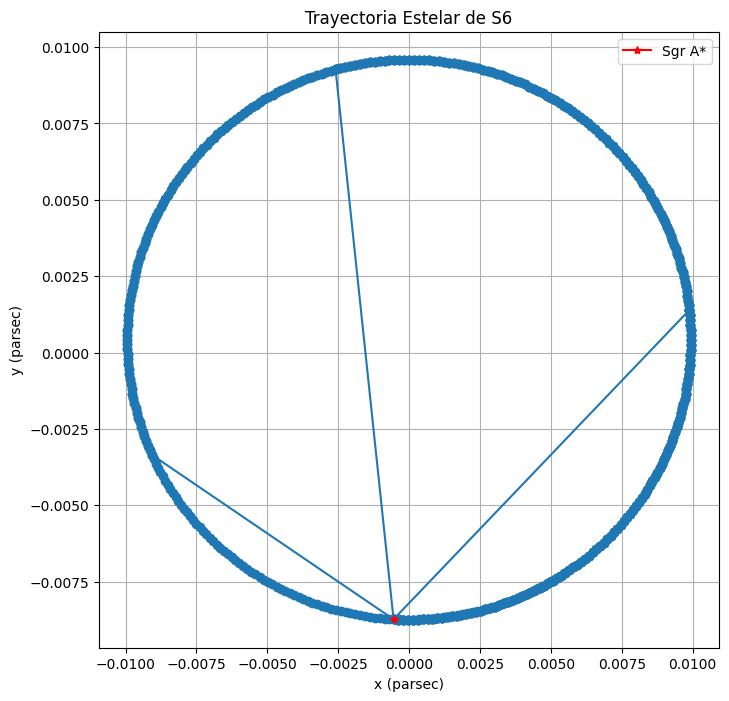

In [ ]:
# Graficar la posición de Sagittarius A* en coordenadas cartesianas
plt.figure(figsize=(8, 8))

# Graficar la trayectoria
plt.plot(x, y, marker='o')
plt.plot(x[0],y[0])
plt.plot(x_sag, y_sag, color='red', marker='*', label='Sgr A*')
plt.xlabel('x (parsec)')
plt.ylabel('y (parsec)')
plt.title('Trayectoria Estelar de S6')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:

coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs', pm_ra_cosdec=pm_ra, pm_dec=pm_dec, obstime='J5000')

coord , h0 = MCMC(coord , x_s6 , z_s6 , 50 , 10**3)

print(coord)
print(h0)

<SkyCoord (ICRS): (ra, dec) in deg
    (200.25976137, -14.81856141)
 (pm_ra_cosdec, pm_dec) in mas / yr
    (-0.02361666, 0.01099354)>
25358.67714566378


In [ ]:
from astropy.coordinates import Galactic, CartesianRepresentation, CartesianDifferential
import astropy.units as u
import numpy as np

# Supongamos que ya tienes las coordenadas galácticas, las velocidades galácticas y la distancia
# (asegúrate de tener las unidades correctas)
coordenadas_galacticas = coord.transform_to(Galactic)
velocidades_galacticas_masyr = coordenadas_galacticas.velocity.d_xyz
distancia_pc = 12.562  # Coloca aquí la distancia en parsecs

# Convertir velocidades angulares a velocidades lineales en km/s
constante_conversion = (distancia_pc * u.pc).to(u.km)
velocidades_lineales_kmps = (velocidades_galacticas_masyr * constante_conversion).to(u.km/u.s)

# Transformar coordenadas galácticas a coordenadas cartesianas
coordenadas_cartesianas = coordenadas_galacticas.represent_as(CartesianRepresentation)

# Obtener velocidades cartesianas en coordenadas cartesianas
# (asegúrate de tener las unidades correctas)
velocidades_cartesianas = CartesianDifferential(velocidades_lineales_kmps)

# Calcular las aceleraciones cartesianas
aceleraciones_cartesianas = np.gradient(velocidades_cartesianas.d_xyz, axis=-1) / (31556952*30) /u.s  # Suponiendo un intervalo de tiempo unitario

# Mostrar las velocidades cartesianas y aceleraciones cartesianas
print("Coordenadas cartesianas:", coordenadas_cartesianas)
print("Velocidades cartesianas en km/s:", velocidades_cartesianas)
print("Aceleraciones cartesianas en km/s^2:", aceleraciones_cartesianas)

Coordenadas cartesianas: (0.46589855, -0.49026119, 0.736602) 
Velocidades cartesianas en km/s: (-0.00137261, -0.00040658, 0.00059757) km / s
Aceleraciones cartesianas en km/s^2: [1.02041322e-12 1.04054055e-12 1.06066788e-12] km / s2


In [ ]:
from sympy import symbols, Eq, solve

# Definir las variables simbólicas
beta, lambd = symbols('beta lambd')

# Definir las ecuaciones del sistema

G = 6.6743e-11
ce = 299792458
M = 1.98840987e+30 * 19.5

x = 0.46589855 * 3.086e+16
y = -0.49026119 * 3.086e+16
vx = -0.00137268 * 1000
vy = -0.00040651 * 1000
ax = 1.02041322e-12
ax = -4.910863379944221e-12
ay = 1.04054055e-12
ay = 5.167660909395138e-12
r = np.sqrt(x**2 + y**2)
v = np.sqrt(vx**2 + vy**2)

ecuacion1 = Eq(-G*M*x/(r**3) +
               G*M/(ce**2 * r**4)*(x*(4*G*M + r*(3*vx**2 - vy**2)) + 4*r*vx*vy*y) + beta * 2*G*M*x/(ce**2 * r**4)*(r*(v**2 - ce**2) + 2*G*M) -
               4*G*lambd*M**2/(r**8) * (G*M*r*x + 2*(vx*x+vy*y) * (vx*(x**2 - 2*y**2) + 3*vy*x*y)),
               ax)
ecuacion2 = Eq(-G*M*y/(r**3) + G*M/(ce**2 * r**4)*(y*(4*G*M + r*(3*vy**2 - vx**2)) + 4*r*vx*vy*x) + beta * 2*G*M*y/(ce**2 * r**4)*(r*(v**2 - ce**2) + 2*G*M) -
               4*G*lambd*M**2/(r**8) * (G*M*r*y + 2*(vx*x+vy*y) * (vy*(y**2 - 2*x**2) + 3*vx*x*y)),
               ay)

# Resolver el sistema de ecuaciones
solucion = solve((ecuacion1, ecuacion2), (beta, lambd))

# Mostrar la solución
print("La solución del sistema de ecuaciones es:", solucion)

La solución del sistema de ecuaciones es: {beta: 0.0999999999985426, lambd: 1.38808473216797}


In [ ]:
-G*M*x/(r**3) +  G*M/(ce**2 * r**4)*(x*(4*G*M + r*(3*vx**2 - vy**2)) + 4*r*vx*vy*y) + 0.1 * 2*G*M*x/(ce**2 * r**4)*(r*(v**2 - ce**2) + 2*G*M) -4*G*0.01*M**2/( r**8) * (G*M*r*x + 2*(vx*x+vy*y) * (vx*(x**2 - 2*y**2) + 3*vy*x*y))

-4.910863379944221e-12

In [ ]:
-G*M*y/(r**3) + G*M/(ce**2 * r**4)*(y*(4*G*M + r*(3*vy**2 - vx**2)) + 4*r*vx*vy*x) + 0.1 * 2*G*M*y/(ce**2 * r**4)*(r*(v**2 - ce**2) + 2*G*M) - 4*G*0.01*M**2/( r**8) * (G*M*r*y + 2*(vx*x+vy*y) * (vy*(y**2 - 2*x**2) + 3*vx*x*y))

5.167660909395138e-12

In [ ]:
# beta para MCMC

betas = np.linspace(0.1, 40 , 20)
h = []
for beta in betas:
  coord , h0 = MCMC(coord , x_s6 , z_s6 , beta , 10**2)
  h.append(h0)



/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/usr/local/lib/python3.10/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "pmsafe" yielded 1 of "distance overridden (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


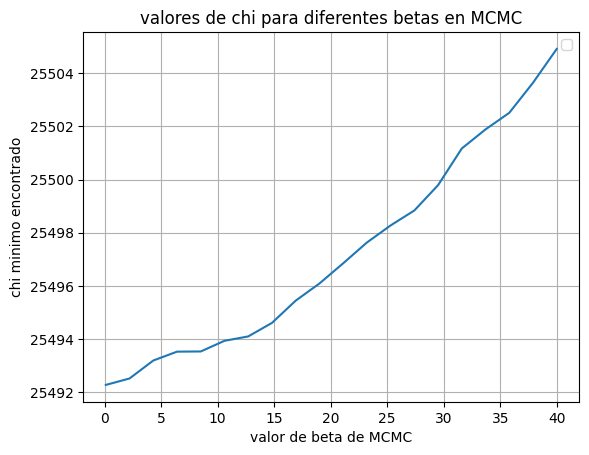

In [ ]:
# los h0 para distintos betas
plt.plot(betas, h)
plt.xlabel('valor de beta de MCMC')
plt.ylabel('chi minimo encontrado')
plt.title('valores de chi para diferentes betas en MCMC')
plt.grid(True)
plt.legend()
plt.show()